In [ ]:
import pandas as pd
import numpy as np
from apyori import apriori
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/anonymous-msweb.data')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.reset_index()
df

,type,id,num,name,url
0,A,1287,1,International AutoRoute,/autoroute
1,A,1288,1,library,/library
2,A,1289,1,Master Chef Product Information,/masterchef
3,A,1297,1,Central America,/centroam
4,A,1215,1,For Developers Only Info,/developer
...,...,...,...,...,...
131654,V,1035,1,NaN,NaN
131655,V,1001,1,NaN,NaN
131656,V,1018,1,NaN,NaN
131657,C,42711,42711,NaN,NaN


This dataset appears to have the following format:

1. Some metadata that doesn't matter to me at the beginning
2. IDs, names, and URLs for the VRoots, labeled 'A'
3. Users, marked with 'C'
4. User data, directly under the user entry, marked with a 'V'. The number here refers to the VRoots ID

All I need from this dataset (for the computation, at least) is the list of sites.

In [ ]:
newRecord = False
tmp = []
lst = []

for index, row in df.iterrows():
  if (row['type'] == 'V'):
    tmp.append(row['id'])
  elif (row['type'] == 'C'):
    lst.append(tmp.copy())
    tmp.clear()
    

In [ ]:
rules = apriori(lst,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)

In [ ]:
results = list(rules)
results

In [ ]:
df_results = pd.DataFrame(results)

In [ ]:
df_results

,items,support,ordered_statistics
0,"(1000, 1014)",0.011403,"[((1000), (1014), 0.4089912280701754, 18.37707..."
1,"(1000, 1040)",0.007215,"[((1000), (1040), 0.2587719298245614, 5.620643..."
2,"(1001, 1003)",0.055211,"[((1001), (1003), 0.4057515165131431, 4.471879..."
3,"(1001, 1035)",0.029592,"[((1001), (1035), 0.21747921815322402, 3.97206..."
4,"(1001, 1046)",0.008774,"[((1046), (1001), 0.45125786163522014, 3.31635..."
...,...,...,...
461,"(1035, 1037, 1008, 1009, 1018)",0.004127,"[((1008, 1037), (1009, 1018, 1035), 0.28784648..."
462,"(1026, 1034, 1038, 1008, 1041)",0.003730,"[((1008, 1038), (1041, 1026, 1034), 0.25363825..."
463,"(1035, 1037, 1009, 1017, 1018)",0.004708,"[((1017, 1035), (1009, 1018, 1037), 0.41847826..."
464,"(1001, 1003, 1004, 1035, 1009, 1018)",0.003149,"[((1001, 1003, 1009), (1018, 1035, 1004), 0.26..."


In [ ]:
support = df_results.support

In [ ]:
first = []
second = []
third = []
fourth = []

for index, row in df_results.iterrows():
  first.append(row[2][0][0])
  second.append(row[2][0][1])
  third.append(row[2][0][2])
  fourth.append(row[2][0][3])

In [ ]:
lhs = pd.DataFrame(first)
rhs = pd.DataFrame(second)

confidence = pd.DataFrame(third,columns = ['confidence'])

lift = pd.DataFrame(fourth,columns = ['lift'])

In [ ]:
df_final = pd.concat([lhs,rhs,support,confidence,lift],axis=1)
df_final

,0,1,2,0,1,2,support,confidence,lift
0,1000,NaN,NaN,1014,NaN,NaN,0.011403,0.408991,18.377077
1,1000,NaN,NaN,1040,NaN,NaN,0.007215,0.258772,5.620643
2,1001,NaN,NaN,1003,NaN,NaN,0.055211,0.405752,4.471879
3,1001,NaN,NaN,1035,NaN,NaN,0.029592,0.217479,3.972062
4,1046,NaN,NaN,1001,NaN,NaN,0.008774,0.451258,3.316355
...,...,...,...,...,...,...,...,...,...
461,1008,1037.0,NaN,1009,1018.0,1035.0,0.004127,0.287846,10.016751
462,1008,1038.0,NaN,1041,1026.0,1034.0,0.003730,0.253638,22.484447
463,1017,1035.0,NaN,1009,1018.0,1037.0,0.004708,0.418478,35.834666
464,1001,1003.0,1009.0,1018,1035.0,1004.0,0.003149,0.268229,19.941010


In [ ]:
df_final.columns = ['lhs','lhs1','lhs2','rhs','rhs1','rhs2','support','confidence','lift']

In [ ]:
df_final

,lhs,lhs1,lhs2,rhs,rhs1,rhs2,support,confidence,lift
0,1000,NaN,NaN,1014,NaN,NaN,0.011403,0.408991,18.377077
1,1000,NaN,NaN,1040,NaN,NaN,0.007215,0.258772,5.620643
2,1001,NaN,NaN,1003,NaN,NaN,0.055211,0.405752,4.471879
3,1001,NaN,NaN,1035,NaN,NaN,0.029592,0.217479,3.972062
4,1046,NaN,NaN,1001,NaN,NaN,0.008774,0.451258,3.316355
...,...,...,...,...,...,...,...,...,...
461,1008,1037.0,NaN,1009,1018.0,1035.0,0.004127,0.287846,10.016751
462,1008,1038.0,NaN,1041,1026.0,1034.0,0.003730,0.253638,22.484447
463,1017,1035.0,NaN,1009,1018.0,1037.0,0.004708,0.418478,35.834666
464,1001,1003.0,1009.0,1018,1035.0,1004.0,0.003149,0.268229,19.941010


In [ ]:
#turn names into a dictionary

dictionary = {}
type(dictionary)

for index, row in df.iterrows():
  if row['type'] == 'A':
    dictionary[row['id']] = row['name']

In [ ]:
dictionary

In [ ]:
#translate nums to names
tmp = []
lhs = []
rhs = []
lst = []

for index, row in df_final.iterrows():
  #define lhs first
  lhs.append(dictionary[row['lhs']])
  if not math.isnan(row['lhs1']): lhs.append(dictionary[row['lhs1']])
  if not math.isnan(row['lhs2']): lhs.append(dictionary[row['lhs2']])
  #define rhs
  rhs.append(dictionary[row['rhs']])
  if not math.isnan(row['rhs1']): 
    rhs.append(dictionary[row['rhs1']])
  if not math.isnan(row['rhs2']): 
    rhs.append(dictionary[row['rhs2']])
  #put everything together
  tmp.append(lhs.copy())
  tmp.append(rhs.copy())
  tmp.append(row['support'])
  tmp.append(row['confidence'])
  tmp.append(row['lift'])
  lst.append(tmp.copy())
  lhs.clear()
  rhs.clear()
  tmp.clear()

print(lst)

[[['regwiz'], ['Office Free Stuff'], 0.011402891993519, 0.4089912280701754, 18.3770770074224], [['regwiz'], ['MS Office Info'], 0.007214698419491914, 0.2587719298245614, 5.620643158360709], [['Support Desktop'], ['Knowledge Base'], 0.05521078536272202, 0.4057515165131431, 4.47187933175924], [['Support Desktop'], ['Windows95 Support'], 0.029592491822322767, 0.21747921815322402, 3.9720618118426083], [['IE Support'], ['Support Desktop'], 0.008773806976246523, 0.45125786163522014, 3.3163549566276536], [['Support Network Program Information'], ['Support Desktop'], 0.0089572315123353, 0.8542274052478135, 6.27783254393647], [['NT Workstation Support'], ['Support Desktop'], 0.008498670172113356, 0.6261261261261262, 4.601485444105081], [['MS Office Support'], ['Support Desktop'], 0.0036379199657607534, 0.767741935483871, 5.642239148868323], [['NT Server Support'], ['Support Desktop'], 0.009538075876616429, 0.6753246753246753, 4.963052225240498], [['IT Technical Information'], ['Support Desktop'

In [ ]:
readable = pd.DataFrame(lst)
readable.columns = 'lhs','rhs','support','confidence','lift'
readable

,lhs,rhs,support,confidence,lift
0,[regwiz],[Office Free Stuff],0.011403,0.408991,18.377077
1,[regwiz],[MS Office Info],0.007215,0.258772,5.620643
2,[Support Desktop],[Knowledge Base],0.055211,0.405752,4.471879
3,[Support Desktop],[Windows95 Support],0.029592,0.217479,3.972062
4,[IE Support],[Support Desktop],0.008774,0.451258,3.316355
...,...,...,...,...,...
461,"[Free Downloads, Windows 95]","[Windows Family of OSs, isapi, Windows95 Support]",0.004127,0.287846,10.016751
462,"[Free Downloads, SiteBuilder Network Membership]","[Developer Workshop, Internet Site Constructio...",0.003730,0.253638,22.484447
463,"[Products , Windows95 Support]","[Windows Family of OSs, isapi, Windows 95]",0.004708,0.418478,35.834666
464,"[Support Desktop, Knowledge Base, Windows Fami...","[isapi, Windows95 Support, Microsoft.com Search]",0.003149,0.268229,19.941010


In [ ]:
#readable.to_csv('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/AprioriOutput.csv')

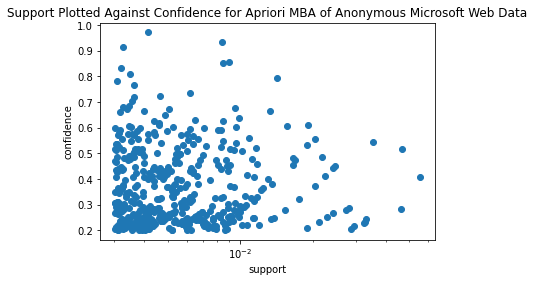

In [ ]:
plt.scatter(readable['support'],readable['confidence'])
plt.xlabel("support")
plt.ylabel("confidence")
plt.xscale('log')
plt.title("Support Plotted Against Confidence for Apriori MBA of Anonymous Microsoft Web Data")

#plt.savefig('/content/drive/MyDrive/School/d. Undergrad/Year 2/Spring/CSC 240/Figure1.png')